In [212]:
# animation function. This is called sequentially
%matplotlib widget
%load_ext jupyter_spaces
# %matplotlib ipympl
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual, GridspecLayout
from ipycanvas import RoughCanvas, Canvas, hold_canvas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datasets


The jupyter_spaces extension is already loaded. To reload it, use:
  %reload_ext jupyter_spaces


# Overview

1. Overview of the uses of neural networks.
2. An APP to claissify plants on weeds or not weeds.
    - Overview of the App (see below lecture go walkthrough.
    - 10 individual pixels
    - show the outputs of the nodes, maybe be able to tweek the outputs/weighting of the inputs.
    - discuss the output of the neural network, point to later about the output changes based on the objective.
3. What is a neural network?
    - Overview
    - Building blocks
    - Input and Output
3. Getting a neural network to work with our app?
    - The decisions we have to make
    - Forward (input -> output/answer)
    - Backward (training) -> (MAYBE?)
5. Getting into the "weeds" *This could be extra if they are interested* -> Drop and drag interfaces? Maybe using drop down menus… This could even very simply actually implement the weed classification toy example and they can see how their changes effects the outcomes (see https://playground.tensorflow.org/ for an example of this idea).
    - Different losses produce difference answers
    - Input data cleaning needs to be thought through.
    - Different architectures?
    - Optimization is important (maybe not this far into the weeds)
6. More resources
    - NN vis resources
    - Using NNs for apps resources
    - Deep Learning book?
    - The little book of deep learning.

# The App

- Work through the weed app example at a high level. 
- Discuss what we want from a the app, what decision/prediction needs to be made for the app (i.e. what we require from a model).
   - What are the requirements etc...
   - How do we expect the prediction component to return an answer.
- Discuss neural networks and how they can be used to solve this problem in our app.

# Neural Networks - Introduction/overview

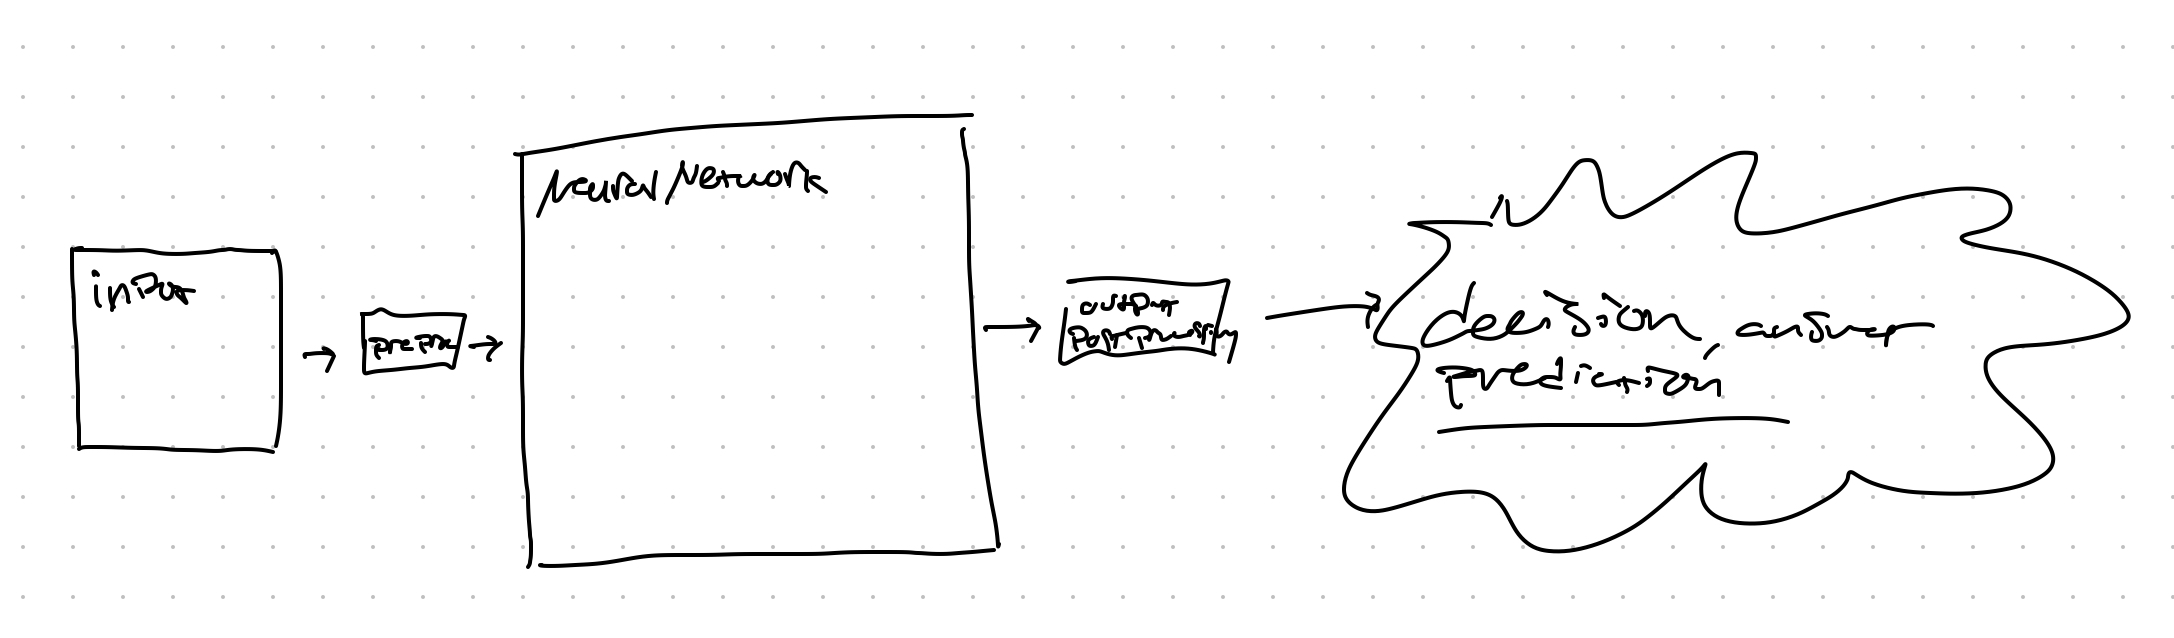

In [322]:
# # canvas = Canvas(width="100%", height=200)
# canvas = Canvas()
# canvas.width = 1000
# canvas.height = 500
# canvas.fill_style = "white"
# canvas.fill_rect(0,0,canvas.width, canvas.height)

# canvas.fill_style = "grey"
# canvas.stroke_style = "black"

# canvas.fill_rect(25, 200, 100, 100)
# canvas.stroke_rect(25, 200, 100, 100)

# canvas.font = "32pt serif"
# canvas.fill_style = "black"
# canvas.fill_text("Input", 30, 250)

# canvas.line_width = 4
# canvas.stroke_line(125, 250, 200, 250)
# canvas.stroke_line(175, 225, 199, 250)
# canvas.stroke_line(175, 275, 199, 250)

# # canvas.

# canvas

1. What is a neural network?
2. How are neural networks used? What applications are they good at?
3. The scaffold of a neural network
    - Input data (possibly with preprocessing)
    - Neural network module
    - output of the neural network

# Working through the design choices of a neural network

There are several levels of abstractions in building a neural network.

## Output

- The output of a NN is dependent on what objective function is used to train the neural network. Think of this in terms of humans deciding what question the neural network should answer.
- This is another visualization.

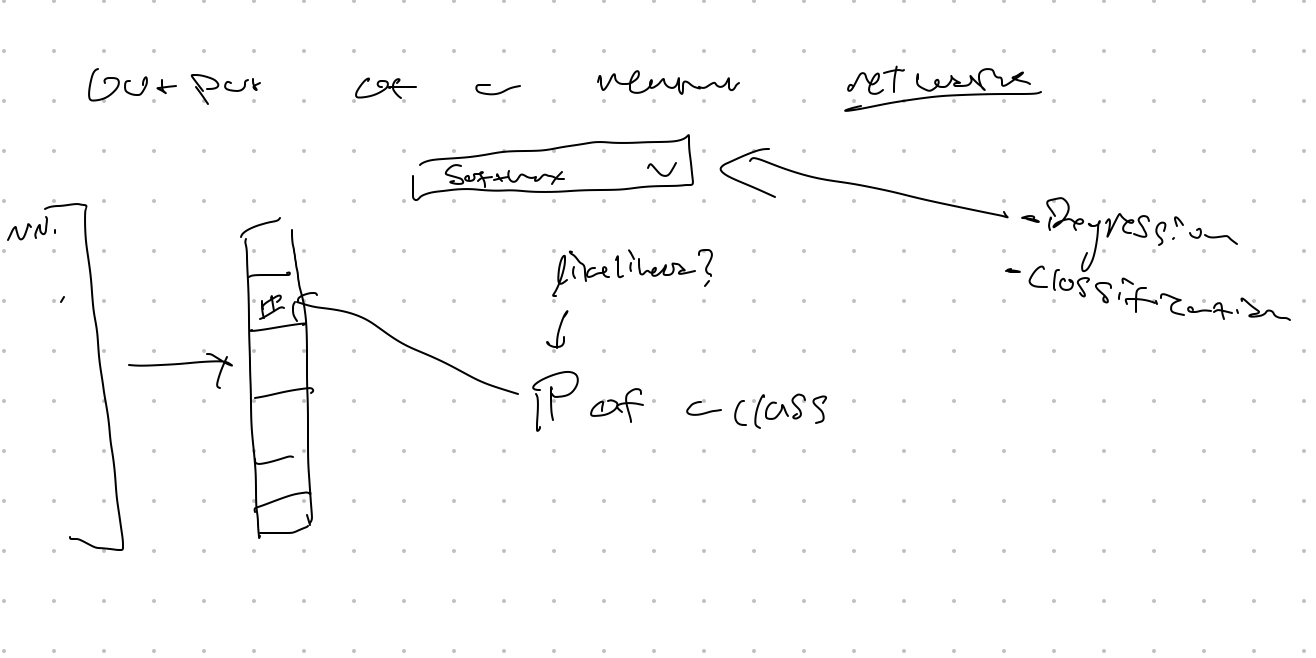

- get a neural network loaded trained on mnist digits. Get them to draw a digit? Maybe a subset of digits.
- Get a neural network to perform an addition function. Make sure the network isn't perfect, give students a chance to play w/ the network to understand its deficiencies.

### Classification Example

In [296]:
%%space output_example
import train_mnist_network
predict, params = train_mnist_network.train_network(16)

canvas_dim = 140
canvas = Canvas(width=canvas_dim, height=canvas_dim, sync_image_data=True)
digit_canvas = Canvas(width=28, height=28)
def reset_canvas(btn):
    canvas.fill_style="black"
    canvas.fill_rect(0,0,canvas_dim,canvas_dim)
reset_canvas(None)
mnist_data = datasets.mnist_raw()[0]
                       
mouse_down = [False]

brightness_slider = widgets.IntSlider(min=0, max=255, value=0)
size_slider = widgets.IntSlider(min=5, max=20, step=5)
def rgb_to_hex(v):
    return '#{:02x}{:02x}{:02x}'.format(v, v, v)
reset_button = widgets.Button(description="Reset")
def reset_button_func(btn):
    reset_canvas(None)
    print_prediction_from_input(np.zeros((28, 28), np.float32))
reset_button.on_click(reset_button_func)

zero_digit_button = widgets.Button(description="Mnist Digit")
def draw_zero_digit(btn):
    reset_canvas(None)
    image_data = np.repeat(mnist_data[1][:,:,np.newaxis], 3, 2)
    digit_canvas.put_image_data(image_data, 0, 0)
    canvas.draw_image(digit_canvas, 0, 0, canvas_dim, canvas_dim)
    print_prediction_from_input(mnist_data[1] / np.float32(255.))
    # get_prediction()
zero_digit_button.on_click(draw_zero_digit)

random_digit_button = widgets.Button(description="Random Mnist Digit")
def draw_random_digit(btn):
    reset_canvas(None)
    idx = np.random.randint(0, 300)
    image_data = np.repeat(mnist_data[idx][:,:,np.newaxis], 3, 2)
    digit_canvas.put_image_data(image_data, 0, 0)
    canvas.draw_image(digit_canvas, 0, 0, canvas_dim, canvas_dim)
    print_prediction_from_input(mnist_data[idx] / np.float32(255.))
random_digit_button.on_click(draw_random_digit)

# @out.capture()
def handle_mouse_move(x, y):
    if mouse_down[0]:
        canvas.fill_rect((x//5)*5, (y//5)*5, size_slider.value, size_slider.value)
    
canvas.on_mouse_move(handle_mouse_move)

def handle_mouse_down(x, y):
    mouse_down[0] = True
    canvas.fill_style = rgb_to_hex(brightness_slider.value)
    canvas.fill_rect((x//5)*5, (y//5)*5, size_slider.value, size_slider.value)

# canvas.
canvas.on_mouse_down(handle_mouse_down)

def handle_mouse_up(x, y):
    mouse_down[0] = False
    print_prediction_from_canvas()

def handle_mouse_out(x, y):
    if mouse_down[0]:
        print_prediction_from_canvas()
    mouse_down[0] = False
    

canvas.on_mouse_up(handle_mouse_up)
canvas.on_mouse_out(handle_mouse_out)


out = widgets.Output(layout=widgets.Layout(width="200px"))
@out.capture()
def print_prediction_from_canvas(cnvs=canvas):
    digit_image = cnvs.get_image_data()
    digit_image = digit_image[::5, ::5, 0]
    digit_image = digit_image / np.float32(255.)
    print_prediction_from_input(digit_image)

@out.capture()
def print_prediction_from_input(x):
    y_hat = get_prediction(x)
    out.clear_output()
    for i in range(10):
        print("{}: {:.3f}".format(i, y_hat[i]))

def get_prediction(x):
    return np.exp(predict(params, np.reshape(x, (-1))))

print_prediction_from_input(np.zeros((28, 28), np.float32))

cnvs_box = widgets.Box([canvas])
cnvs_box.layout.object_fit = "contain"
out_box = widgets.HBox([widgets.Label("Network Output: "), out])
bx = widgets.Box([widgets.VBox([size_slider, brightness_slider, reset_button, zero_digit_button, random_digit_button]), cnvs_box, out_box])
bx.layout.object_fit = "contain"
bx.layout.align_items = "center"
bx

Box(children=(VBox(children=(IntSlider(value=5, max=20, min=5, step=5), IntSlider(value=0, max=255), Button(de…

## Input

- Input to a neural network often needs to be transformed to work well with neural networks

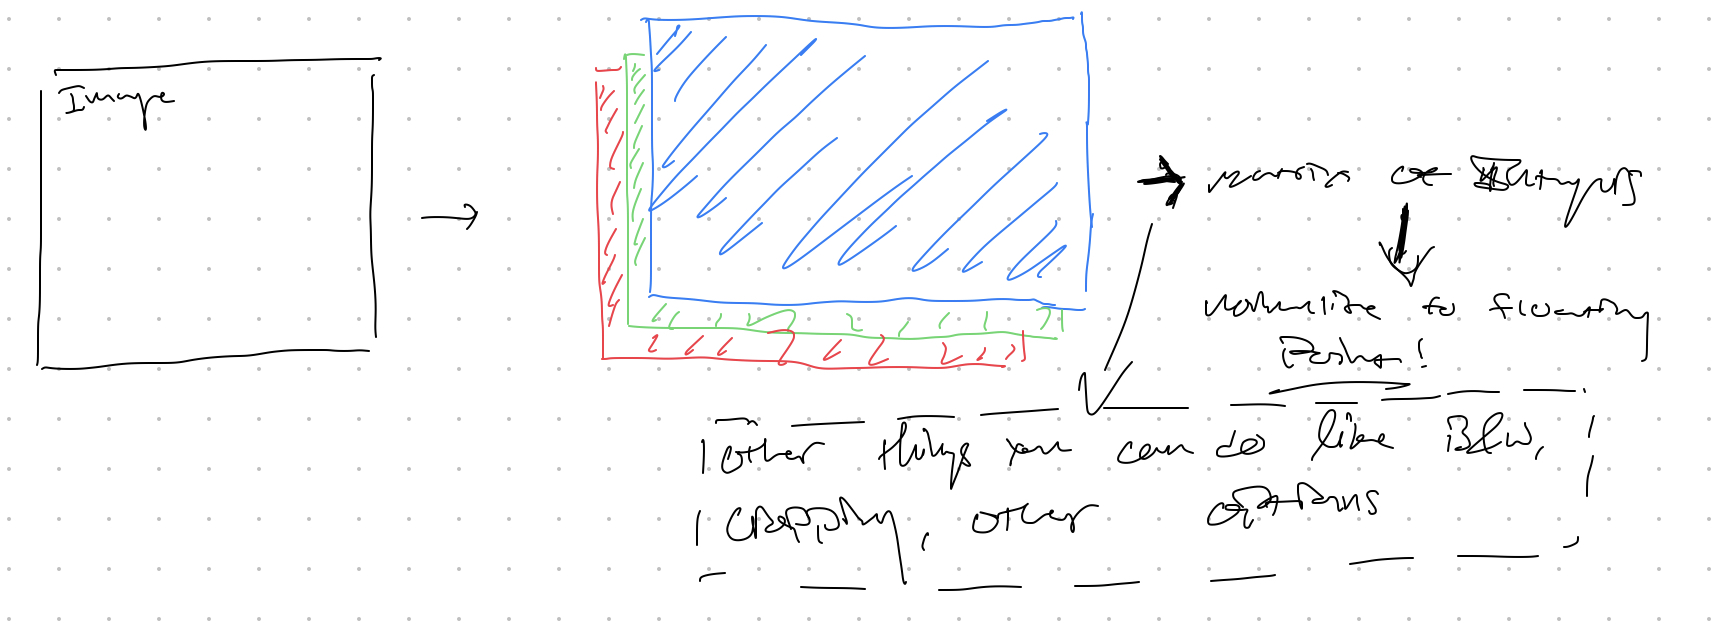

### Black and White image example

In [321]:
%%space bw_input_example

canvas_dim = 200
blk_size = 40
canvas = Canvas(width=canvas_dim, height=canvas_dim, sync_image_data=True)
def reset_canvas(btn):
    canvas.fill_style="black"
    canvas.fill_rect(0,0,canvas_dim,canvas_dim)
reset_canvas(None)
mnist_data = datasets.mnist_raw()[0]
                       
mouse_down = [False]

brightness_slider = widgets.IntSlider(min=0, max=255, value=0)
def rgb_to_hex(v):
    return '#{:02x}{:02x}{:02x}'.format(v, v, v)
reset_button = widgets.Button(description="Reset")
def reset_button_func(btn):
    reset_canvas(None)
    print_input_from_input(np.zeros((canvas_dim//blk_size, canvas_dim//blk_size), dtype=np.uint8))
reset_button.on_click(reset_button_func)

# @out.capture()
def handle_mouse_move(x, y):
    if mouse_down[0]:
        canvas.fill_rect((x//blk_size)*blk_size, (y//blk_size)*blk_size, blk_size, blk_size)
    
canvas.on_mouse_move(handle_mouse_move)

def handle_mouse_down(x, y):
    mouse_down[0] = True
    canvas.fill_style = rgb_to_hex(brightness_slider.value)
    canvas.fill_rect((x//blk_size)*blk_size, (y//blk_size)*blk_size, blk_size, blk_size)

# canvas.
canvas.on_mouse_down(handle_mouse_down)

def handle_mouse_up(x, y):
    mouse_down[0] = False
    print_input_from_canvas()

def handle_mouse_out(x, y):
    if mouse_down[0]:
        print_input_from_canvas()
    mouse_down[0] = False

out_int = widgets.Output(layout=widgets.Layout(width="200px"))
out_float = widgets.Output(layout=widgets.Layout(width="250px"))

def print_input_from_input(x):
    out_int.clear_output()
    out_float.clear_output()
    with out_int:
        print(x)
    with out_float:
        with np.printoptions(precision=2):
            print(x / np.float32(255.))

def print_input_from_canvas():
    digit_image = canvas.get_image_data()
    digit_image = digit_image[::blk_size, ::blk_size, 0]
    print_input_from_input(digit_image)

    
canvas.on_mouse_up(handle_mouse_up)
canvas.on_mouse_out(handle_mouse_out)

print_input_from_input(np.zeros((canvas_dim//blk_size, canvas_dim//blk_size), dtype=np.uint8))

cnvs_box = widgets.Box([canvas])
cnvs_box.layout.object_fit = "contain"
out_box = widgets.HBox([out_int, out_float])
bx = widgets.Box([widgets.VBox([brightness_slider, reset_button]), cnvs_box, out_box])
bx.layout.object_fit = "contain"
bx.layout.align_items = "center"
bx

Box(children=(VBox(children=(IntSlider(value=0, max=255), Button(description='Reset', style=ButtonStyle()))), …

### Color image example

In [183]:
%%space input_example

canvas = Canvas(width=200, height=200, sync_image_data=True)
canvas.fill_style="black"
canvas.fill_rect(0,0,200,200)
# img = canvas.get_image_data()
# out = Output()

mouse_down = [False]

cp = widgets.ColorPicker(
    concise=False,
    description='Pick a color:',
    value='blue',
    disabled=False
)

# @out.capture()
def handle_mouse_move(x, y):
    if mouse_down[0]:
        # canvas.fill_style = "red"
        # canvas.stroke_style = "blue"
        canvas.fill_rect(x, y, 10, 10)
        # plot_img_data()
    
canvas.on_mouse_move(handle_mouse_move)

def handle_mouse_down(x, y):
    mouse_down[0] = True
    canvas.fill_style = cp.value
    canvas.fill_rect(x, y, 10, 10)

# canvas.
canvas.on_mouse_down(handle_mouse_down)

def handle_mouse_up(x, y):
    canvas.fill_stale=cp.value
    mouse_down[0] = False
    plot_img_data()

def handle_mouse_out(x, y):
    canvas.fill_stale=cp.value
    mouse_down[0] = False
    plot_img_data()


canvas.on_mouse_up(handle_mouse_up)
canvas.on_mouse_out(handle_mouse_out)


# ax1.imshow(
rgb_canvas = [Canvas(width=200, height=200), 
              Canvas(width=200, height=200), 
              Canvas(width=200, height=200)]

for i in range(3):
    rgb_canvas[i].layout.padding = "10px"
    rgb_canvas[i].fill_style = "black"
    rgb_canvas[i].fill_rect(0,0,200,200)

bw_canvas = [Canvas(width=200, height=200), 
             Canvas(width=200, height=200), 
             Canvas(width=200, height=200)]

for i in range(3):
    bw_canvas[i].layout.padding = "10px"
    bw_canvas[i].fill_style = "black"
    bw_canvas[i].fill_rect(0,0,200,200)


green_channel = np.zeros((200, 200), np.uint8)


def plot_img_data():
    try:
        img = canvas.get_image_data()
        img[:,:,1] = 0
        img[:,:,2] = 0
        rgb_canvas[0].clear()
        rgb_canvas[0].put_image_data(img, 0,0)
        img[:,:,1] = img[:,:,0]
        img[:,:,2] = img[:,:,0]
        bw_canvas[0].clear()
        bw_canvas[0].put_image_data(img, 0,0)
        img = canvas.get_image_data()
        img[:,:,0] = 0
        img[:,:,2] = 0
        rgb_canvas[1].clear()
        rgb_canvas[1].put_image_data(img, 0,0)
        img[:,:,0] = img[:,:,1]
        img[:,:,2] = img[:,:,1]
        bw_canvas[1].clear()
        bw_canvas[1].put_image_data(img, 0,0)
        img = canvas.get_image_data()
        img[:,:,0] = 0
        img[:,:,1] = 0
        rgb_canvas[2].clear()
        rgb_canvas[2].put_image_data(img, 0,0)
        img[:,:,0] = img[:,:,2]
        img[:,:,1] = img[:,:,2]
        bw_canvas[2].clear()
        bw_canvas[2].put_image_data(img, 0,0)
    except:
        pass

img_box = widgets.Box([canvas])
img_box.layout.object_fit = "contain"

rgb_vbox = widgets.VBox(rgb_canvas)
rgb_vbox.layout.object_fit = "contain"

bw_vbox = widgets.VBox(bw_canvas)
bw_vbox.layout.object_fit = "contain"

reset_button = widgets.Button(description="reset")
def handle_on_click(btn):
    with hold_canvas(canvas):
        canvas.clear()
        canvas.fill_style = "black"
        canvas.fill_rect(0,0,200,200)
    for i in range(3):
        bw_canvas[i].clear()
        bw_canvas[i].fill_style = "black"
        bw_canvas[i].fill_rect(0,0,200,200)
        rgb_canvas[i].clear()
        rgb_canvas[i].fill_style = "black"
        rgb_canvas[i].fill_rect(0,0,200,200)
    # plot_img_data()
    # canvas.get_image_data()

reset_button.on_click(handle_on_click)
# html_widget = widgets.HTML(value=np.array_str(green_channel))

all_img_box = widgets.Box([img_box, rgb_vbox, bw_vbox])
all_img_box.layout.object_fit = "contain"
all_img_box.layout.align_items = "center"
widgets.VBox([widgets.HBox([cp, reset_button]), all_img_box])

## The building blocks of a neural network

### Neurons
Interactive element. Get the activation of a neuron. Modify the above weights. Play with different activations.

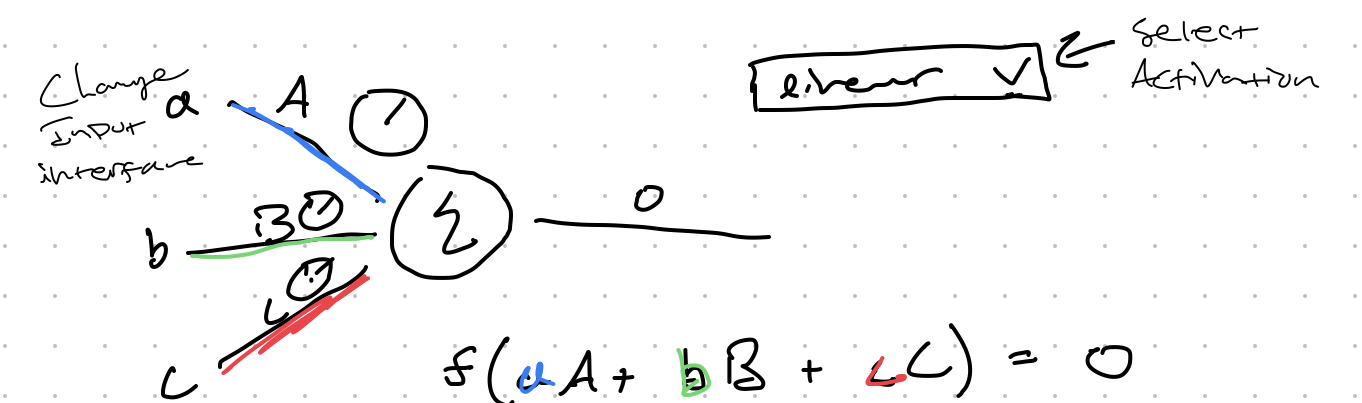

In [323]:
%%space neuron_example_gridspec

color = ["blue", "limegreen", "red"]
input_names = ["a: ", "b: ", "c: "]
weight_names = ["A: ", "B: ", "C: "]

grid = GridspecLayout(8,  8)

input_items = [widgets.FloatSlider(value=0,
                   min=-1.0,
                   max=1.0,
                   # description=input_names[i],
                   orientation="vertical",
                   disabled=False,
                   readout=False,
                   step=0.001,
                   layout=widgets.Layout(height='75px')
               ) for i in range(3)]

weight_items = [widgets.FloatSlider(min=-10.0,
        max=10.0,
        # description=weight_names[i],
        disabled=False,
        orientation='horizontal',
        # readout=False,
        step=0.01,
        style={"handle_color": color[i]},
        layout=widgets.Layout(width='200px')) for i in range(3)]

for i in range(3):
    grid[((2*(i+1))):((2*(i+1))+2), 0] = widgets.HBox(
        [widgets.Label(input_names[i], style={"text_color":color[i], "font_weight":"bold", "font_size":"20px"}),
         input_items[i]
        ], layout=widgets.Layout(align_items="center", justify_content="flex-end"))
    grid[1, (2*i+1):(2*i+3)] = widgets.HBox(
    [widgets.Label(weight_names[i], style={"text_color":color[i], "font_weight":"bold", "font_size":"20px"}),
     weight_items[i]
     ], layout=widgets.Layout(padding="5px",justify_content="center"))

canv_img = RoughCanvas(width=850, height=400)


grid[2:, 1:8] = canv_img

grid[0, 0] = widgets.Label("Activation:", style={"font_weight":"bold", "font_size":"20px"}, layout=widgets.Layout(justify_content="flex-end",padding="5px"))
act_widget = widgets.Dropdown(value="Linear", options=["Linear", "Sigmoid", "ReLu"], layout=widgets.Layout(width="100px", padding="5px"))
grid[0, 1] = act_widget

grid[1,0] = widgets.Label("Weights: ", style={"font_weight":"bold", "font_size":"20px"}, layout=widgets.Layout(justify_content="flex-end",padding="5px"))
# grid[2, 0] = widgets.Label("Inputs", style={"font_weight":"bold", "font_size":"20px"}, layout=widgets.Layout(justify_content="center"))


def neuron_output(a, b, c, A, B, C, act):
    v = a*A + b*B + c*C
    if act == "Linear":
        return v
    elif act == "ReLu":
        return max(0, v)
    elif act == "Sigmoid":
        return 1/(1 + np.exp(-v))

def draw_canvas(a, b, c, A, B, C, act, canvas):
    with hold_canvas(canvas):
        canvas.clear()
        canvas_width = 850
        canvas_height = 400
        center_align = 200
        
        canvas.fill_style = "white"
        canvas.fill_rect(0, 0, canvas_width, canvas_height)
        canvas.stroke_style = "black"
        canvas.line_width = 3
        canvas.stroke_circle(250, center_align, 50)
        canvas.fill_style="black"
        canvas.font = "75px Comic Sans MS"
        canvas.fill_text("Σ", 250-27, center_align+25)

        canvas.stroke_style="blue"
        Aweight = (abs(A)/10)*5
        if Aweight >= 0.1:
            canvas.line_width = Aweight
            canvas.stroke_line(0, 75, 200, center_align)
        Bweight = (abs(B)/10)*5
        canvas.stroke_style="green"
        if Bweight >= 0.1:
            canvas.line_width = Bweight
            canvas.stroke_line(0, center_align, 200, center_align)
        Cweight = (abs(C)/10)*5
        canvas.stroke_style="red"
        if Cweight >= 0.1:
            canvas.line_width = Cweight
            canvas.stroke_line(0, 325, 200, center_align)

        # draw arrow for output.
        canvas.line_width = 3
        canvas.stroke_style="black"
        canvas.stroke_line(300+1, center_align, 335, center_align)
        canvas.stroke_line(335-10, center_align+10, 335, center_align)
        canvas.stroke_line(335-10, center_align-10, 335, center_align)

        canvas.font = "30px Comic Sans MS"
        canvas.fill_text("%.2f" % neuron_output(a, b, c, A, B, C, "Linear"), 340, center_align+10)

        canvas.stroke_line(450+1, center_align, 575, center_align)
        canvas.stroke_line(575-10, center_align+10, 575, center_align)
        canvas.stroke_line(575-10, center_align-10, 575, center_align)
        canvas.fill_text(act, 450, center_align-10)
        canvas.fill_text("%.2f" % neuron_output(a, b, c, A, B, C, act), 575+2, center_align+10)
    


draw_canvas(input_items[0].value, input_items[1].value, input_items[2].value,
               weight_items[0].value, weight_items[1].value, weight_items[2].value,
               act_widget.value, canv_img)


def on_value_change(change):
    draw_canvas(input_items[0].value, input_items[1].value, input_items[2].value,
               weight_items[0].value, weight_items[1].value, weight_items[2].value,
               act_widget.value, canv_img)

# draw_neuron_image(num_input_slider.value, num_neuron_slider.value, canvas)
# draw_simplified_image(num_input_slider.value, num_neuron_slider.value, canvas)
input_items[0].observe(on_value_change, names='value')
input_items[1].observe(on_value_change, names='value')
input_items[2].observe(on_value_change, names='value')
weight_items[0].observe(on_value_change, names='value')
weight_items[1].observe(on_value_change, names='value')
weight_items[2].observe(on_value_change, names='value')
act_widget.observe(on_value_change, names='value')


grid


GridspecLayout(children=(HBox(children=(Label(value='a: ', style=LabelStyle(font_size='20px', font_weight='bol…

### Layers
Visual. See the multi-neuron layer go to a simplified representation of a layer with multiple outputs.

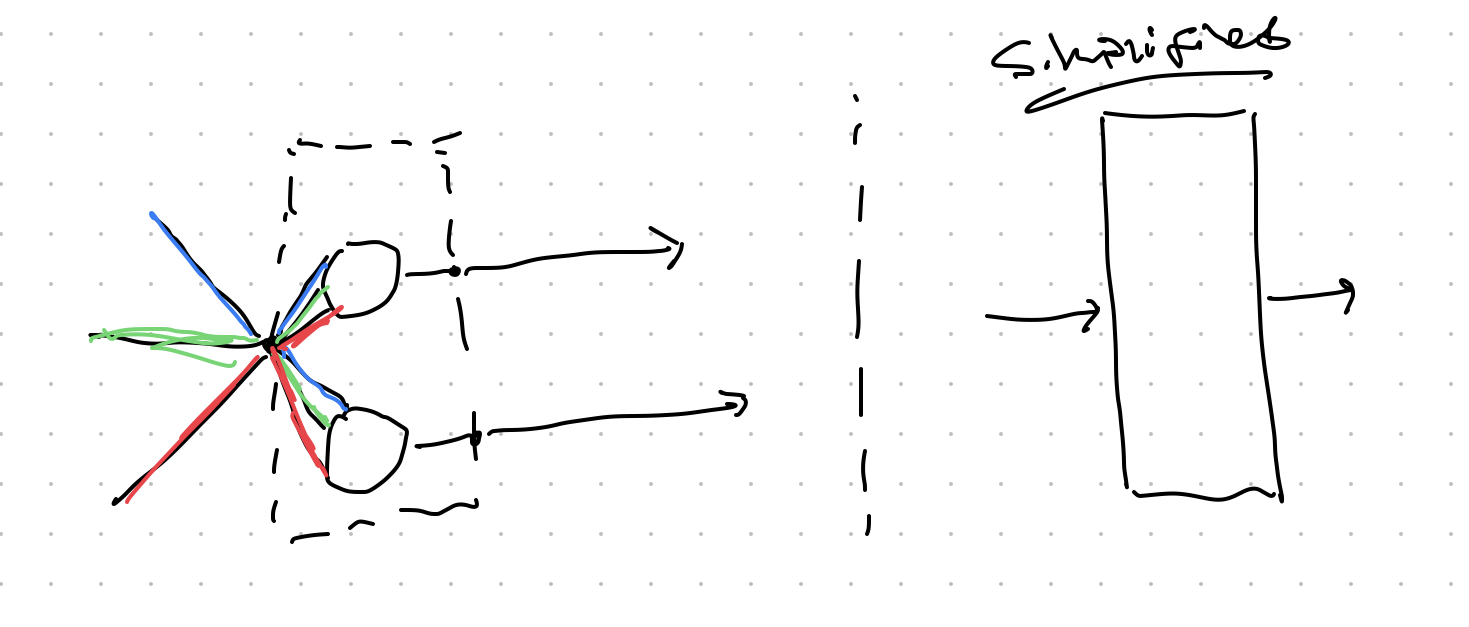

In [12]:
%%space neurons_to_layer
color_pallet = sns.color_palette("colorblind", 10).as_hex()
num_neuron_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=8,
    step=1)
num_input_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1)

input_randomizer_button = widgets.Button(description='Randomize Input')
weight_randomizer_button = widgets.Button(description='Randomize Weights')
act_widget = widgets.Dropdown(value="Linear", options=["Linear", "Sigmoid", "ReLu"], layout=widgets.Layout(width="100px", padding="5px"))


# grid = GridspecLayout(9,  9)

circle_radius = 20
canvas_height = 500
canvas_width = 1000
canvas = RoughCanvas(width=1000, height=500)

def draw_neuron_image(num_inputs, num_neurons, canvas):
    with hold_canvas(canvas=canvas):
        canvas.clear()
        canvas.fill_style = "white"
        canvas.fill_rect(0, 0, 1000, 500)
        canvas.set_line_dash([10, 5])
        canvas.line_width = 4
        if not isinstance(canvas, RoughCanvas):
            canvas.shadow_offset_x = 4
            canvas.shadow_offset_y = 5
            canvas.shadow_blur = 10
            canvas.shadow_color = "grey"

        ######
        # Draw the nerons and surounding rectangle.
        ######
        circ_padding = 6
        rect_width = 140
        rect_height = num_neurons*(circle_radius*2+circ_padding)+circ_padding
        rect_x = 126
        rect_y = canvas_height/2 - rect_height/2
        # middle right of the rectangle (not exact mid)
        rect_mid = (rect_x, rect_y + rect_height/2)
        canvas.set_line_dash([])
        canvas.line_width = 1
        canvas.fill_rect(rect_x-2, canvas_height/2 - rect_height/2-2, rect_width+4, rect_height+4)
        canvas.fill_rect(rect_x+rect_width+42, canvas_height/2 - rect_height/2, 50, rect_height)
        canvas.fill_rect(rect_x-92, canvas_height/2 - 75, 40, 150)
        canvas.stroke_style = "black"
        canvas.stroke_rect(rect_x-92, canvas_height/2 - 75, 40, 150)
        canvas.fill_style="white"
        canvas.shadow_offset_x = 0
        canvas.shadow_offset_y = 0
        canvas.shadow_blur = 0
        canvas.shadow_color = "grey"
        canvas.stroke_style = "black"
        canvas.set_line_dash([10, 5])
        canvas.line_width = 3
        canvas.stroke_rect(rect_x, canvas_height/2 - rect_height/2, rect_width, rect_height)
        canvas.set_line_dash([])
        for i in range(num_neurons):
            canvas.line_width = 1
            canvas.fill_style = "#a8c6fe"
            canvas.fill_circle(rect_x+rect_width/2, 
                                 rect_y + i*((2*circle_radius)+circ_padding)+circ_padding+circle_radius, 
                                 circle_radius)
            canvas.line_width = 3
            canvas.stroke_circle(rect_x+rect_width/2, 
                                 rect_y + i*((2*circle_radius)+circ_padding)+circ_padding+circle_radius, 
                                 circle_radius)
            canvas.line_width = 3
            _x = rect_x+rect_width+42
            _y =  rect_y + i*((2*circle_radius)+circ_padding) + circ_padding + circle_radius
            canvas.stroke_line(rect_x + rect_width/2 + circle_radius, 
                               rect_y + i*((2*circle_radius)+circ_padding) + circ_padding + circle_radius,
                               _x, _y
                              )
            canvas.stroke_line(_x-12, _y+10, _x, _y)
            canvas.stroke_line(_x-12, _y-10, _x, _y)
        canvas.line_width = 3
        
        out_rect_start_x = rect_x+rect_width+42
        out_rect_start_y = canvas_height/2 - rect_height/2
        
        # canvas.stroke_line(rect_mid[0]+rect_width, rect_mid[1], out_rect_start_x-2, rect_mid[1])
        # canvas.stroke_line(rect_mid[0]+rect_width+30, rect_mid[1]+10, out_rect_start_x-2, rect_mid[1])
        # canvas.stroke_line(rect_mid[0]+rect_width+30, rect_mid[1]-10, out_rect_start_x-2, rect_mid[1])
        
        canvas.stroke_rect(rect_x+rect_width+42, canvas_height/2 - rect_height/2, 50, rect_height)
        for i in range(num_neurons-1):
            _y = out_rect_start_y+(i+1)*(circle_radius*2+circ_padding)
            canvas.stroke_line(out_rect_start_x, _y, out_rect_start_x+50, _y)
        
        #####
        # Draw the lines for inputs.
        #####
        
        line_start_x = rect_x - 50
        if num_inputs == 1:
            neg_in_line_end_theta = pos_in_line_end_theta = mid_in_line_end_theta = [math.pi]
            line_start_y = [rect_mid[1]]
        else:
            line_start_y = np.linspace(rect_mid[1]-50, rect_mid[1]+50, num_inputs)
            neg_in_line_end_theta = np.flip(np.linspace(math.pi, math.pi+math.pi/5, num_inputs))
            pos_in_line_end_theta = np.flip(np.linspace(math.pi-math.pi/5, math.pi, num_inputs))
            mid_in_line_end_theta = np.flip(np.linspace(math.pi-math.pi/8, math.pi+math.pi/8, num_inputs))
        for i in range(num_inputs):
            canvas.stroke_style = color_pallet[i]
            canvas.line_width = 3
            canvas.stroke_line(line_start_x, line_start_y[i], rect_mid[0], rect_mid[1])
            for j in range(num_neurons):
                canvas.line_width = 1
                rradius=circle_radius+2
                if num_neurons % 2 == 0:
                    if j < num_neurons // 2:
                        line_end_x = rradius*math.cos(pos_in_line_end_theta[i])
                        line_end_y = rradius*math.sin(pos_in_line_end_theta[i])               
                    else:
                        line_end_x = rradius*math.cos(neg_in_line_end_theta[i])
                        line_end_y = rradius*math.sin(neg_in_line_end_theta[i])
                else:
                    if j < num_neurons // 2:
                        line_end_x = rradius*math.cos(pos_in_line_end_theta[i])
                        line_end_y = rradius*math.sin(pos_in_line_end_theta[i])
                    elif j == num_neurons // 2:
                        line_end_x = rradius*math.cos(mid_in_line_end_theta[i])
                        line_end_y = rradius*math.sin(mid_in_line_end_theta[i])
                    else:
                        line_end_x = rradius*math.cos(neg_in_line_end_theta[i])
                        line_end_y = rradius*math.sin(neg_in_line_end_theta[i])
                    
                canvas.stroke_line(rect_mid[0], rect_mid[1], rect_x+rect_width/2+line_end_x, rect_y + j*((2*circle_radius)+circ_padding)+circ_padding+circle_radius+ line_end_y)

        canvas.font = "32px helvetica"
        canvas.fill_style="black"
        canvas.fill_text("Input", rect_x-105, canvas_height/2 - 85)
        canvas.fill_text("\"Layer\"", rect_x+rect_width/6, canvas_height/2 - rect_height/2-16)
        canvas.fill_text("Output", rect_x+rect_width+21, canvas_height/2 - rect_height/2-16)

def draw_simplified_image(num_inputs, num_neurons, canvas):
    with hold_canvas(canvas=canvas):
        # canvas.clear()
        canvas.fill_style = "white"
        # canvas.fill_rect(0, 0, 1000, 500)
        # canvas.set_line_dash([10, 5])
        canvas.line_width = 4
        if not isinstance(canvas, RoughCanvas):
            canvas.shadow_offset_x = 4
            canvas.shadow_offset_y = 5
            canvas.shadow_blur = 10
            canvas.shadow_color = "grey"

        ######
        # Draw the nerons and surounding rectangle.
        ######
        circ_padding = 6
        rect_width = 100
        rect_height = num_neurons*(circle_radius*2+circ_padding)+circ_padding
        rect_x = 600
        input_rect_x = rect_x-92
        rect_y = canvas_height/2 - rect_height/2
        canvas.stroke_style="black"
        canvas.set_line_dash([10, 5])
        canvas.stroke_line(input_rect_x-75, 0, input_rect_x-75, canvas_height)
        # middle right of the rectangle (not exact mid)
        rect_mid = (rect_x, rect_y + rect_height/2)
        canvas.set_line_dash([])
        canvas.line_width = 1
        canvas.fill_style = "grey"
        canvas.fill_rect(rect_x-2, canvas_height/2 - rect_height/2-2, rect_width+4, rect_height+4)
        canvas.fill_style = "white"
        canvas.fill_rect(rect_x+rect_width+42, canvas_height/2 - rect_height/2, 50, rect_height)
        canvas.fill_rect(input_rect_x, canvas_height/2 - 75, 40, 150)
        canvas.stroke_style = "black"
        canvas.stroke_rect(input_rect_x, canvas_height/2 - 75, 40, 150)
        canvas.fill_style="white"
        canvas.shadow_offset_x = 0
        canvas.shadow_offset_y = 0
        canvas.shadow_blur = 0
        canvas.shadow_color = "grey"
        canvas.stroke_style = "black"
        # canvas.set_line_dash([10, 5])
        canvas.line_width = 3
        canvas.stroke_rect(rect_x, canvas_height/2 - rect_height/2, rect_width, rect_height)
        canvas.set_line_dash([])
        _x = rect_x+rect_width+42
        _y =  rect_y + rect_height/2
        canvas.stroke_line(_x-12, _y-10, _x, _y)
        canvas.stroke_line(rect_x + rect_width, 
                           _y,
                           _x, _y
                          )
        canvas.stroke_line(_x-12, _y+10, _x, _y)
        canvas.stroke_line(_x-12, _y-10, _x, _y)        
        canvas.line_width = 3
        
        out_rect_start_x = rect_x+rect_width+42
        out_rect_start_y = canvas_height/2 - rect_height/2
        
        canvas.stroke_rect(rect_x+rect_width+42, canvas_height/2 - rect_height/2, 50, rect_height)
        
        #####
        # Draw the lines for inputs.
        #####
        
        line_start_x = rect_x - 50
        if num_inputs == 1:
            neg_in_line_end_theta = pos_in_line_end_theta = mid_in_line_end_theta = [math.pi]
            line_start_y = [rect_mid[1]]
        else:
            line_start_y = np.linspace(rect_mid[1]-50, rect_mid[1]+50, num_inputs)
            neg_in_line_end_theta = np.flip(np.linspace(math.pi, math.pi+math.pi/5, num_inputs))
            pos_in_line_end_theta = np.flip(np.linspace(math.pi-math.pi/5, math.pi, num_inputs))
            mid_in_line_end_theta = np.flip(np.linspace(math.pi-math.pi/8, math.pi+math.pi/8, num_inputs))
        for i in range(num_inputs):
            canvas.stroke_style = color_pallet[i]
            canvas.line_width = 3
            canvas.stroke_line(line_start_x, line_start_y[i], rect_mid[0], rect_mid[1])

        canvas.font = "32px helvetica"
        canvas.fill_style="black"
        canvas.fill_text("Input", rect_x-105, canvas_height/2 - 85)
        canvas.fill_text("\"Layer\"", rect_x, canvas_height/2 - rect_height/2-16)
        canvas.fill_text("Output", rect_x+rect_width+21, canvas_height/2 - rect_height/2-16)


def on_value_change(change):
    draw_neuron_image(num_input_slider.value, num_neuron_slider.value, canvas)
    draw_simplified_image(num_input_slider.value, num_neuron_slider.value, canvas)


draw_neuron_image(num_input_slider.value, num_neuron_slider.value, canvas)
draw_simplified_image(num_input_slider.value, num_neuron_slider.value, canvas)
num_input_slider.observe(on_value_change, names='value')
num_neuron_slider.observe(on_value_change, names='value')

widgets.VBox([widgets.HBox([widgets.Label("Number of Inputs:", style={"font_weight":"bold", "font_size":"20px"}), num_input_slider]), 
              widgets.HBox([widgets.Label("Numer of Neurons:", style={"font_weight":"bold", "font_size":"20px"}), num_neuron_slider]), 
              canvas])




# Applying a neural network to our App

1. Forward (getting a prediction)
    - Pre-processing input (subsample image, integers to floating point numbers)
    - The forward part of the neural network
    - The output (what does it mean??)
2. Making a neural network useful (training)
    - Making small adjustements to lower the error of our prediction.
    - Tweaking NNs

### What would you do?

What would you choose in the app described in section 1?
1. How would you process the input data?
2. What kind of answer would you want from the neural network?

## Preprocessing the input data

Subselect data points, normalize pixels from 0-1.

## Setting up the neural network

Fully connected layers (maybe we should enable the ability for people to play with different sizes/depths of networks here).

## Getting a prediction from our neural network

Classification, using something called "cross-entropy".

## The full Network!

This will have the neural network. How deep of an implementation do we want to do?

So we see the issue here. We have a system that is performant, at least on the examples we tried it on, but we don't really understand it well. Questions:
1. Will it work well on all the plant pictures a user might feed it? What could you imagine being an issue?
2. How would we communicate to the user when the system recieves an image it doens't know how to classify?
3. Should we deploy our hypothetical App? What kinds of applications should we be more careful about?
4. Come up with your own example app using a neural network for regression! (We only expect a few sentences focusing on the input an output of the network, you don't need to create a full example like we did here).
5. 



# Getting into the weeds (Extra)

- Getting into the "weeds" *This could be extra if they are interested* -> Drop and drag interfaces? Maybe using drop down menus… This could even very simply actually implement the weed classification toy example and they can see how their changes effects the outcomes (see https://playground.tensorflow.org/ for an example of this idea).
    - Different losses produce different answers -> Extending the outputs section
    - Input data cleaning needs to be thought through -> Different normalization techniques results in different levels of performance, your data may also need more cleaning.
    - Different architectures? -> Different configurations of layers result in the ability to learn from different types of data more easily.
    - Optimization is important (maybe not this far into the weeds) -> The algorithm we use for training can make a diffference in the networks ability to soak up data.

## Making our neural network useful

- "Training" our network.
    - What does that entail?
    - How do we do that in a NN package?
    - Where can I go to read more?

## Example of classification/a neural network doing something.

- I really like the smiley face example from https://course.elementsofai.com/5/1. But likely need to modify it to make it more unique for our course.
    - Maybe something like ghost vs pacman, 
    - Maybe covered in the next section.
    - Add visualization of entire network working??

# More resources

In [92]:
from ipycanvas import Canvas, hold_canvas

canvas = Canvas(width=600, height=600)
canvas.fill_style = "#584f4e"
canvas.fill_rect(0, 0, 600, 600)


objects_to_draw = []


class Square_obj:
    def __init__(self, x, y, width=100, height=40):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.selected = False
        objects_to_draw.append(self)

    def set_x_y(self, x_in, y_in):
        self.x = x_in
        self.y = y_in

    def draw(self):
        canvas.fill_style = "#38a8a4"
        canvas.fill_rect(
            self.x - (self.width * 0.5), self.y - (self.height), self.width, self.height
        )
        if self.selected:
            canvas.fill_style = "#9dcea6"
        else:
            canvas.fill_style = "#dee7bc"
        canvas.fill_rect(
            self.x - (self.width * 0.5),
            self.y - (self.height * 0.5),
            self.width,
            self.height,
        )

    def is_selected(self, x_in, y_in):
        x_coord = self.x - (self.width * 0.5)
        y_coord = self.y - (self.height * 0.5)

        if (
            x_in > x_coord
            and x_in < (x_coord + self.width)
            and y_in > y_coord
            and y_in < (y_coord + self.height)
        ):
            self.set_selected(True)
            return True
        else:
            self.set_selected(False)
            return False

    def set_selected(self, state):
        self.selected = state


def canvas_restart():
    canvas.clear()
    canvas.fill_style = "#584f4e"
    canvas.fill_rect(0, 0, 600, 600)


def handle_mouse_down(x, y):
    if [o for o in objects_to_draw if o.selected]:
        [o.set_selected(False) for o in objects_to_draw if o.selected]
        return False

    check_bool_pos = list(
        set([check_region.is_selected(x, y) for check_region in objects_to_draw])
    )
    if len(check_bool_pos) == 1:
        if check_bool_pos[0] == False:
            s = Square_obj(x, y)
            s.set_selected(False)
            s.draw()

        else:
            canvas_restart()
            [o.draw() for o in objects_to_draw]

    if len(check_bool_pos) == 0:
        s = Square_obj(x, y)
        s.set_selected(False)
        s.draw()


def handle_mouse_move(x, y):
    if [o for o in objects_to_draw if o.selected]:
        with hold_canvas():
            [o for o in objects_to_draw if o.selected][-1].set_x_y(x, y)
            canvas_restart()
            [o.draw() for o in objects_to_draw]


canvas.on_mouse_down(handle_mouse_down)
canvas.on_mouse_move(handle_mouse_move)


canvas

Canvas(height=600, width=600)